## IMDB影评数据-二分类

### 加载数据

In [10]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [2]:
max(max(sequence) for sequence in  train_data)  # 索引在（0,999）

9999

In [3]:
train_data.shape  # 一维张量，没篇不一样

(25000,)

In [4]:
# 映射一下数据
word_index = imdb.get_word_index()  #word_index 是一个将单词映射为整数索引的字典
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])  # 方向字典
decoded_review = ' '.join(
 [reverse_word_index.get(i - 3, '?') for i in train_data[0]]) 
# 0、1、2是为“padding”（填充）、“start of sequence”（序列开始）、“unknown”（未知词）分别保留的索引
# 原始序列化的时候都+3,0,1,2保留给上面，字典中没变，get(*,'?')获得value,f找不到回复‘？’
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 数据预处理

In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
        results = np.zeros((len(sequences), dimension)) 
        for i, sequence in enumerate(sequences):
            results[i, sequence] = 1.           #重复不管，每次取一行，取后sequence是一个list,对每一行有值就取1
        return results
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
# 标签向量化
y_train = np.asarray(train_labels).astype('float32')  # 变成列表和浮点
y_test = np.asarray(test_labels).astype('float32') # 变成列表和浮点

In [9]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

### 模型搭建

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # 二分类


# 优化器
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',     # 损失函数
metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


### 划分验证集

In [14]:
x_val = x_train[:10000]  # 验证数据
partial_x_train = x_train[10000:]  # 训练数据
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 训练

In [16]:
history = model.fit(partial_x_train
                    ,partial_y_train
                    ,epochs=20    # 做20次
                    ,batch_size=512
                    ,validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 12s 823us/step - loss: 0.5300 - accuracy: 0.7852 - val_loss: 0.3947 - val_accuracy: 0.8726
Epoch 2/20
15000/15000 [==============================] - 3s 225us/step - loss: 0.3173 - accuracy: 0.9007 - val_loss: 0.3387 - val_accuracy: 0.8666
Epoch 3/20
15000/15000 [==============================] - 3s 223us/step - loss: 0.2298 - accuracy: 0.9271 - val_loss: 0.2823 - val_accuracy: 0.8895
Epoch 4/20
15000/15000 [==============================] - 4s 238us/step - loss: 0.1780 - accuracy: 0.9437 - val_loss: 0.2722 - val_accuracy: 0.8904
Epoch 5/20
15000/15000 [==============================] - 4s 245us/step - loss: 0.1438 - accuracy: 0.9539 - val_loss: 0.2791 - val_accuracy: 0.8887
Epoch 6/20
15000/15000 [==============================] - 4s 243us/step - loss: 0.1170 - accuracy: 0.9658 - val_loss: 0.2912 - val_accuracy: 0.8868
Epoch 7/20
15000/15000 [==============================] - 4s

### 可视化
#### loss

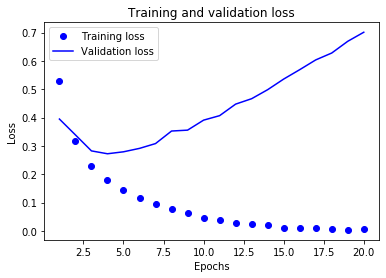

In [22]:
import matplotlib.pyplot as plt
history_dict = history.history   #信息字典


loss_values = history_dict['loss']  # 训练集的loss
val_loss_values = history_dict['val_loss']  # 验证集的loss
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

#### accuracy

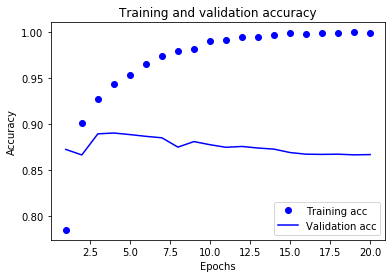

In [26]:
plt.clf()  # 清空 

acc = history_dict['accuracy'] 
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
acc = np.mean(acc)
acc

0.9686467

### 重构模型  - 改变epochs
### test数据上结果

In [30]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop'
              ,loss='binary_crossentropy'
              ,metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)  # 训练集全扔进去
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 10s 405us/step - loss: 0.5374 - accuracy: 0.8084
Epoch 2/4
25000/25000 [==============================] - 3s 126us/step - loss: 0.3223 - accuracy: 0.8982
Epoch 3/4
25000/25000 [==============================] - 3s 121us/step - loss: 0.2331 - accuracy: 0.9201
Epoch 4/4
25000/25000 [==============================] - 45s 2ms/step


In [31]:
results  # loss 和 accuracy

[0.28053938200950623, 0.8894799947738647]

In [32]:
model.predict(x_test)

array([[0.21811754],
       [0.99991727],
       [0.9244898 ],
       ...,
       [0.10910511],
       [0.10587415],
       [0.5470175 ]], dtype=float32)

In [35]:
prediction = model.predict_classes(x_test)  # 类别

### 编写混淆矩阵

In [37]:
prediction.reshape(-1)

array([0, 1, 1, ..., 0, 0, 1])

In [41]:
import pandas as pd

pd.crosstab(y_test,prediction.reshape(-1)
            ,rownames=['label标准答案']
           ,colnames=['predict'])

predict,0,1
label标准答案,,
0.0,10955,1545
1.0,1218,11282


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89     12500
         1.0       0.88      0.90      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000

